In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import numpy as np
import seaborn as sns

from helpers.data import load_mnist_dataloader
from helpers.networks import *
from helpers.train import *

from warnings import filterwarnings
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

filterwarnings("ignore")

In [2]:
input_size = (1, 28, 28)
hidden_size = 128
num_classes = 10
num_epochs = 10
batch_size = 64
learning_rate = 0.001

model_path = 'lenet5_mnist.pth'
model = LeNet5(num_classes, input_size, apply_softmax=True)
if model_path not in os.listdir('../models'):
    train_loader, test_loader = load_mnist_dataloader(batch_size)
    model, criterion, optimizer = load_lenet5(num_classes, input_size, learning_rate)
    train(model, criterion, optimizer, train_loader, num_epochs)
    save_model(model, f'../models/{model_path}')
else:
    load_model(model, f'../models/{model_path}')

Epoch [1/10], Loss: 0.2217
Epoch [2/10], Loss: 0.0658
Epoch [3/10], Loss: 0.0474
Epoch [4/10], Loss: 0.0402
Epoch [5/10], Loss: 0.0320
Epoch [6/10], Loss: 0.0264
Epoch [7/10], Loss: 0.0235
Epoch [8/10], Loss: 0.0195
Epoch [9/10], Loss: 0.0181
Epoch [10/10], Loss: 0.0149
Model saved at ../models/lenet5_mnist.pth


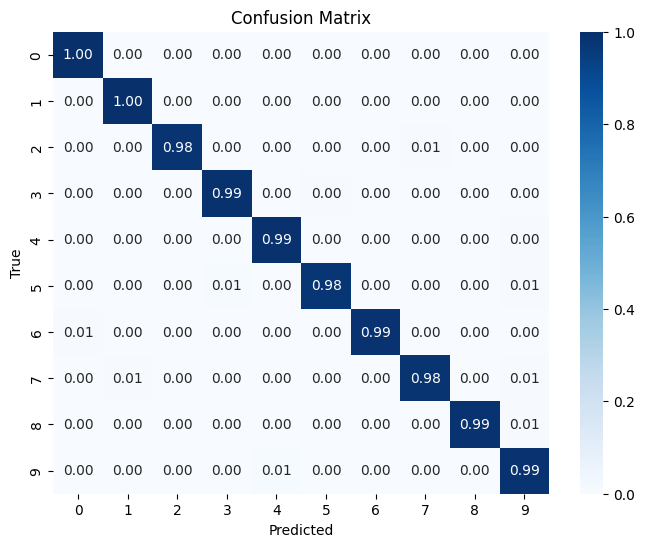

In [5]:
train_loader, test_loader = load_mnist_dataloader(batch_size)

def create_confusion_matrix(dataloader, model, n_classes=10):

    confusion_matrix = np.zeros((n_classes, n_classes))

    for i in range(len(dataloader.dataset)):
        x, label = dataloader.dataset[i]
        x = x.unsqueeze(0)
        out = model(x).detach().numpy()
        pred = np.argmax(out)
        confusion_matrix[label, pred] += 1

    for i in range(n_classes):
        confusion_matrix[i] /= np.sum(confusion_matrix[i])

    return confusion_matrix

def plot_confusion_matrix(confusion_matrix, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='.2f')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


confusion_matrix = create_confusion_matrix(test_loader, model)
plot_confusion_matrix(confusion_matrix)